# <font color='#2F4F4F'>1. Defining the Problem</font>

### a) Specifying the Data Analysis Question

You have been tasked to create a model that predicts the number of taxi orders for the next hour. this will enable Sweet Lift Taxis attract more drivers during peak hours. 


### b) Defining the Metric for Success

The metrics we will use to evaluate our model are RMSE on the test set, and it should not be more than 48.

### c) Understanding the Context 
Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the number of taxi orders for the next hour. 

### d) Recording the Experimental Design

* Defining the Research Question
* Data Importation
* Data Exploration
* Data Cleaning
* Data Analysis (Univariate and Bivariate)
* Data Preparation
* Data Modeling
* Model Evaluation
* Challenging your Solution
* Recommendations / Conclusion 

### e) Data Relevance

The data provided was relevant to answering the research question.

# <font color='#2F4F4F'>2. Data Preparation</font>

In [1]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [2]:
# loading and previewing dataset
df = pd.read_csv('https://bit.ly/3p1QPAv')
df.sample(3)

,datetime,num_orders
20576,2018-07-21 21:20:00,13
16595,2018-06-24 05:50:00,10
17413,2018-06-29 22:10:00,38


In [3]:
df.shape

(26496, 2)

the data has 2 columns, the date and the taxi orders, and 26496 rows of data


Change the data type of the `Datetime` data from object to `datetime64`.

**Hint**

There are two ways to convert a column:
* Pass the new parse_dates argument to the `read_csv()` function;
* Call the `pd.to_datetime()` *function.*

In [6]:
data = pd.read_csv('https://bit.ly/3p1QPAv', parse_dates=[0])
print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB
None


,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32
...,...,...
26491,2018-08-31 23:10:00,32
26492,2018-08-31 23:20:00,24
26493,2018-08-31 23:30:00,27
26494,2018-08-31 23:40:00,39


Checking if the dates and times are in chronological order,


In [7]:
data = pd.read_csv(
    'https://bit.ly/3p1QPAv', index_col=[0], parse_dates=[0]
)
data.sort_index(inplace=True)
print(data.index.is_monotonic)
print(data.info())

True
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None


In [8]:
data.head(5)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [9]:
data.tail(5)

,num_orders
datetime,
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27
2018-08-31 23:40:00,39
2018-08-31 23:50:00,53


the data is chronologically set, from 2018-03-01 00:00:00 to 2018-08-31 23:50:00


# <font color='#2F4F4F'>3. Data Exploration</font>

Plot the time series graph.


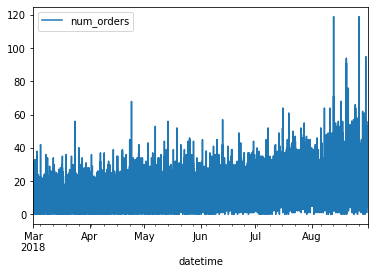

In [11]:
import pandas as pd

data = pd.read_csv(
    'https://bit.ly/3p1QPAv', index_col=[0], parse_dates=[0]
)
data.sort_index(inplace=True)
data = data['2018-03':'2018-08']
data.plot()

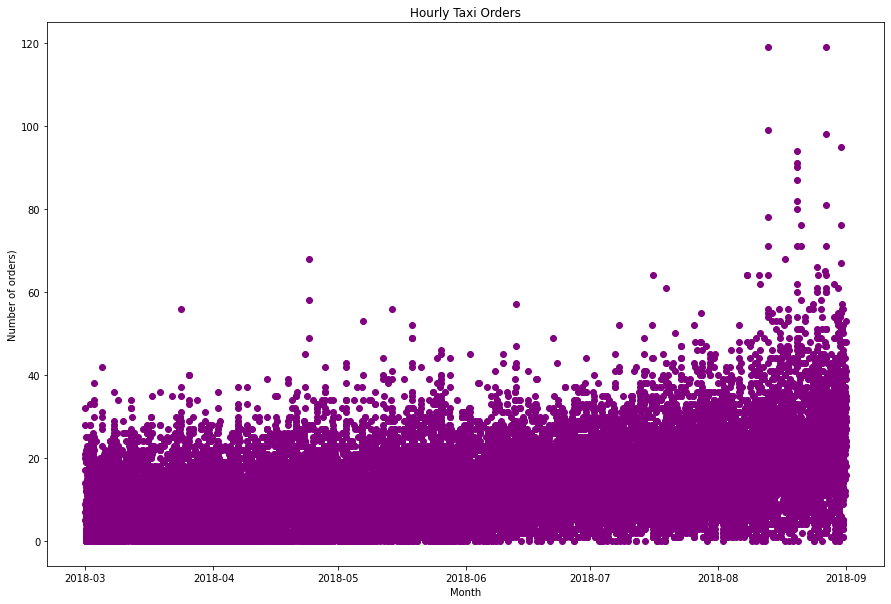

In [26]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(15, 10))

# Add x-axis and y-axis
ax.scatter(data.index.values,
           data['num_orders'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Month",
       ylabel="Number of orders",
       title="Hourly Taxi Orders")

plt.show()

In [51]:
data_monthly_mean = data.resample('1M').mean()
data_monthly_mean

,num_orders
datetime,
2018-03-31,9.580645
2018-04-30,10.634028
2018-05-31,12.280466
2018-06-30,13.867130
2018-07-31,16.667787
2018-08-31,21.275314


In [38]:
data_monthly = data.resample('M').sum()
data_monthly

,num_orders
datetime,
2018-03-31,42768
2018-04-30,45939
2018-05-31,54820
2018-06-30,59906
2018-07-31,74405
2018-08-31,94973


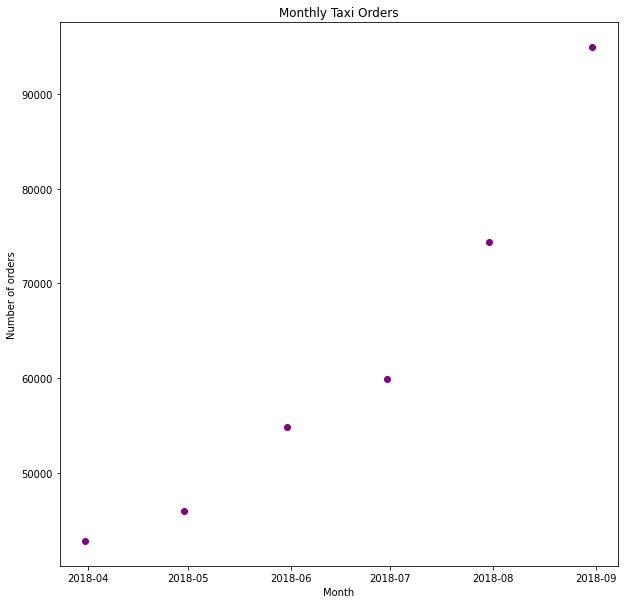

In [44]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(data_monthly.index.values,
           data_monthly['num_orders'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Month",
       ylabel="Number of orders",
       title="Monthly Taxi Orders")

plt.show()

the month of august had the highest numbers of taxi orders. 
there has been month on month growth in the taxi orders 

## 3.1 Resampling

This will summarize data by date or time.

1) The .sum() method will add up all values for each resampling period (in our case, each hour) to provide a summary output value for that hour.

2) The .mean() method will average up all values for each resampling period (in our case, each hour) to provide a summary output value for that hour.


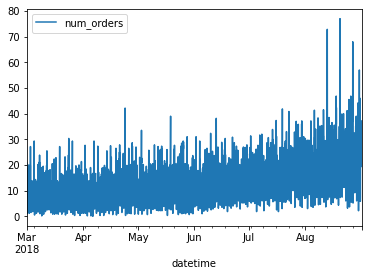

In [45]:
hourly_mean = data.resample('1H').mean()
hourly_mean.plot()

In [43]:
data_hourly = data.resample('1H').sum()
data_hourly

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


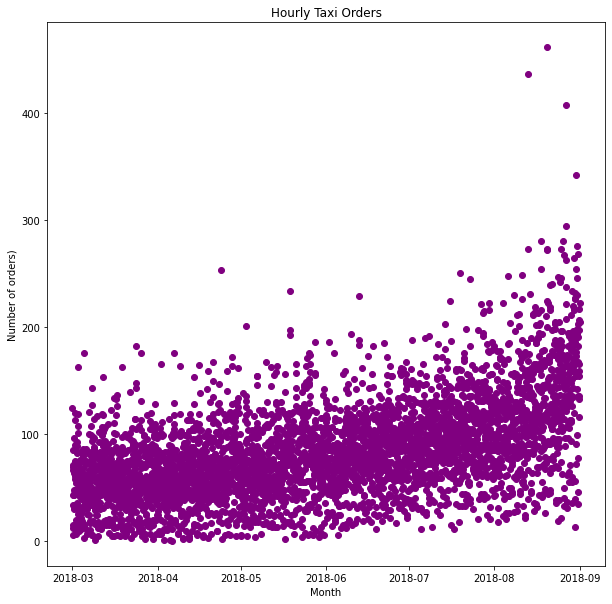

In [46]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(data_hourly.index.values,
           data_hourly['num_orders'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Month",
       ylabel="Number of orders)",
       title="Hourly Taxi Orders")

plt.show()

In [13]:
data_monthly_mean.resample('1H').sum()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


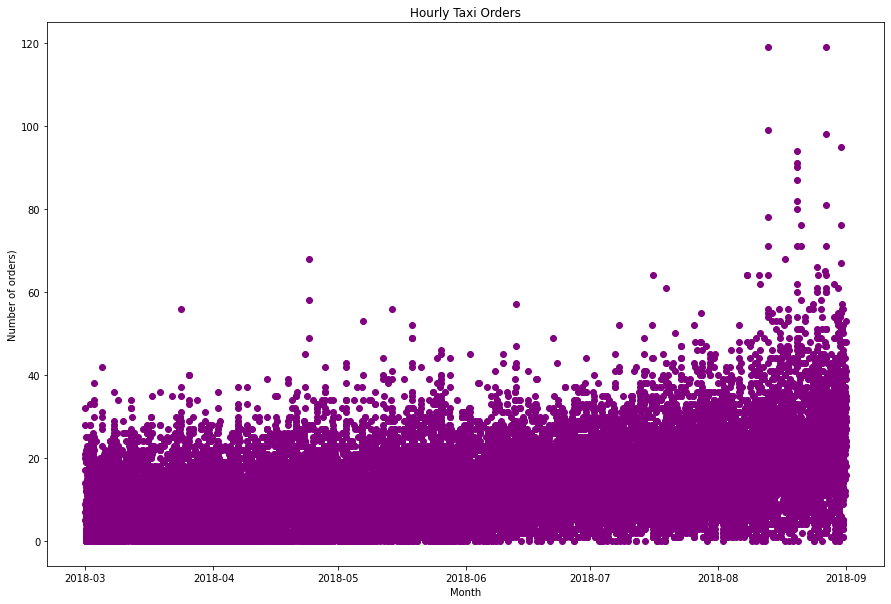

In [47]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(15, 10))

# Add x-axis and y-axis
ax.scatter(data.index.values,
           data['num_orders'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Month",
       ylabel="Number of orders)",
       title="Hourly Taxi Orders")

plt.show()

In [48]:
data.resample('1M').agg(['min','max', 'sum']).head(20)
# data.head(20)

num_orders            
                  min  max    sum
datetime                         
2018-03-31          0   56  42768
2018-04-30          0   68  45939
2018-05-31          0   56  54820
2018-06-30          0   57  59906
2018-07-31          0   64  74405
2018-08-31          0  119  94973

In [ ]:
# data['value2'] = np.random.randint(100,size=len(datetime))
# df['value3'] = np.random.randint(100,size=len(datetime))
# agg_dict = {‘value’:'sum', ‘value2’:'mean', ‘value3’:sub_one_from_sum}
# # Then pass it to the resample using agg function
# df.resample('10min', on = 'Datetime').agg(agg_dict).reset_index()

# <font color='#2F4F4F'>4. Data Modeling</font>

Divide the dataset into training and test sets at a `4:1` ratio. 
Call the `train_test_split()` function with the arguments `shuffle=False` and `test_size=0.2`.


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv(
    'https://bit.ly/3p1QPAv', index_col=[0], parse_dates=[0]
)
data.sort_index(inplace=True)
data = data.resample('1H').sum()

train, test = train_test_split(data, shuffle=False, test_size=0.2)

print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2018-03-01 00:00:00 2018-07-26 03:00:00
2018-07-26 04:00:00 2018-08-31 23:00:00


## 4.1 Base Model Forecast Accuracy


In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import mean_squared_error

data = pd.read_csv(
    'https://bit.ly/3p1QPAv', index_col=[0], parse_dates=[0]
)
data.sort_index(inplace=True)
data = data.resample('1H').sum()

train, test = train_test_split(data, shuffle=False, test_size=0.2)

print('Median Hourly Taxi Orders:', test['num_orders'].median())
pred_median = np.ones(test.shape) * train['num_orders'].median()
print('RMSE:', np.sqrt(metrics.mean_squared_error(test, pred_median)))




Median Hourly Taxi Orders: 120.0
RMSE: 76.00579729020318


**Observation**: The varaince is high at 49% (76/120)
some tuning will be done to reduce this

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


data = pd.read_csv(
    'https://bit.ly/3p1QPAv', index_col=[0], parse_dates=[0]
)
data.sort_index(inplace=True)
data = data.resample('1H').sum()

train, test = train_test_split(data, shuffle=False, test_size=0.2)

print('Median Hourly Taxi Orders:', test['num_orders'].median())

pred_previous = test.shift()
pred_previous.iloc[0] = train.iloc[-1]
print('RMSE:',np.sqrt(metrics.mean_squared_error(test, pred_previous)))


Median Hourly Taxi Orders: 120.0
RMSE: 53.36807644753937


# <font color='#2F4F4F'>5. Feature Engineering</font>

In [65]:
data = pd.read_csv(
    'https://bit.ly/3p1QPAv', index_col=[0], parse_dates=[0]
)
data.sort_index(inplace=True)
data = data.resample('1H').sum()


def make_features(data):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek

make_features(data)
print(data.shape)

(4416, 5)


# <font color='#2F4F4F'>6. Model Training</font>

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.metrics import mean_squared_error

data = pd.read_csv(
    'https://bit.ly/3p1QPAv', index_col=[0], parse_dates=[0]
)
data.sort_index(inplace=True)
data = data.resample('1H').sum()


def make_features(data, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek

    data['rolling_mean'] = (
        data['num_orders'].shift().rolling(rolling_mean_size).mean()
    )


make_features(data, 1)

train, test = train_test_split(data, shuffle=False, test_size=0.2)
train = train.dropna()

features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

model = LinearRegression()
model.fit(features_train, target_train)

pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print(
    'RMSE for the training set:', np.sqrt(metrics.mean_squared_error(target_train, pred_train))
)
print('RMSE for the test set:', np.sqrt(metrics.mean_squared_error(target_test, pred_test)))


RMSE for the training set: 29.288847736904042
RMSE for the test set: 47.573607918855856
